In [1]:
from sentinelhub import SHConfig, SentinelHubRequest, DataCollection, BBox, CRS

In [2]:
lon_min, lat_min = 80,5
lon_max, lat_max = 100,22

In [3]:
bbox = BBox(bbox=[lon_min, lat_min, lon_max, lat_max], crs=CRS.WGS84)

In [4]:
config=SHConfig()

In [5]:
from sentinelhub import MimeType, SentinelHubRequest, SentinelHubDownloadClient

In [6]:
from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

In [7]:
config.sh_client_id='sh-f37ac8be-2275-4846-8a44-f6b07ca0ed2b'
config.sh_client_secret='UjZkqdFcnlyrJC9Qf9vgCU5k5iEAQrku'

In [8]:
config.sh_base_url = "https://sh.dataspace.copernicus.eu"
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"

print("base_url:", config.sh_base_url)
print("token_url:", config.sh_token_url)

base_url: https://sh.dataspace.copernicus.eu
token_url: https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token


In [10]:
request = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript="""
    //VERSION=3
    function setup() {
        return {
            input: ["B04", "B03", "B02"],
            output: { bands: 3 }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
    """,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A
        )
    ],
    responses=[
        SentinelHubRequest.output_response("default", MimeType.PNG)
    ],
    bbox=bbox,
    resolution=(60,60),
    config=config
)

In [11]:
print(request_cdse.config.sh_base_url)

NameError: name 'request_cdse' is not defined

In [12]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'SHConfig', 'SentinelHubRequest', 'DataCollection', 'BBox', 'CRS', '_i2', 'lon_min', 'lat_min', 'lon_max', 'lat_max', '_i3', 'bbox', '_i4', 'config', '_i5', 'MimeType', 'SentinelHubDownloadClient', '_i6', 'DownloadRequest', 'MosaickingOrder', 'bbox_to_dimensions', '_i7', '_i8', '_i9', '_i10', 'request', '_i11', '_i12'])

In [13]:
"request_cdse" in globals(), "request" in globals()


(False, True)

In [16]:
evalscript = """
//VERSION=3
function setup() {
    return {
        input: ["B04", "B03", "B02"],
        output: { bands: 3 }
    };
}

function evaluatePixel(sample) {
    return [sample.B04, sample.B03, sample.B02];
}
"""


In [20]:
from sentinelhub import DataCollection

s2l2a_cdse = DataCollection.SENTINEL2_L2A.define_from(
    "S2L2A_CDSE", 
    service_url="https://sh.dataspace.copernicus.eu"
)


In [21]:
from sentinelhub import SentinelHubRequest, MimeType

request_cdse = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2l2a_cdse,
            time_interval=("2025-12-01", "2025-12-31")  # pick a past month
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    resolution=(60, 60),
    config=config
)

print("DOWNLOAD URL:", request_cdse.get_download_list()[0].url)
response = request_cdse.get_data()



DOWNLOAD URL: https://sh.dataspace.copernicus.eu/api/v1/process


DownloadFailedException: Failed to download from:
https://sh.dataspace.copernicus.eu/api/v1/process
with HTTPError:
400 Client Error: Bad Request for url: https://sh.dataspace.copernicus.eu/api/v1/process
Server response: "{"status": 400, "reason": "Bad Request", "message": "Your request of 2163061.46 meters per pixel exceeds the limit 1500.00 meters per pixel of the collection S2L2A. Please revise the resolution (or corresponding width/height) to make sure it is in supported range.", "code": "COMMON_EXCEPTION"}"

In [22]:
print("bbox:", bbox)
print("bbox coords:", bbox.bbox)
print("CRS:", bbox.crs)


bbox: 80.0,5.0,100.0,22.0


/tmp/ipykernel_9409/2356089669.py:1: SHDeprecationWarning: The string representation of `BBox` will change to match its `repr` representation.
  print("bbox:", bbox)


AttributeError: 'BBox' object has no attribute 'bbox'

In [24]:
min_lon, min_lat = bbox.lower_left
max_lon, max_lat = bbox.upper_right
print(min_lon, min_lat, max_lon, max_lat)


80.0 5.0 100.0 22.0


In [25]:
request_cdse = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2l2a_cdse,
            time_interval=("2025-12-01", "2025-12-31")
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    resolution=(1000, 1000),
    config=config
)

response = request_cdse.get_data()


DownloadFailedException: Failed to download from:
https://sh.dataspace.copernicus.eu/api/v1/process
with HTTPError:
400 Client Error: Bad Request for url: https://sh.dataspace.copernicus.eu/api/v1/process
Server response: "{"status": 400, "reason": "Bad Request", "message": "Your request of 2163061.46 meters per pixel exceeds the limit 1500.00 meters per pixel of the collection S2L2A. Please revise the resolution (or corresponding width/height) to make sure it is in supported range.", "code": "COMMON_EXCEPTION"}"

In [26]:
from sentinelhub import BBox, CRS
bbox = BBox([85.75, 20.20, 86.05, 20.45], crs=CRS.WGS84)  # smaller region

request_cdse = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2l2a_cdse,
            time_interval=("2025-12-01", "2025-12-31")
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    resolution=(60, 60),
    config=config
)

response = request_cdse.get_data()


DownloadFailedException: Failed to download from:
https://sh.dataspace.copernicus.eu/api/v1/process
with HTTPError:
400 Client Error: Bad Request for url: https://sh.dataspace.copernicus.eu/api/v1/process
Server response: "{"status": 400, "reason": "Bad Request", "message": "Your request of 31290.31 meters per pixel exceeds the limit 1500.00 meters per pixel of the collection S2L2A. Please revise the resolution (or corresponding width/height) to make sure it is in supported range.", "code": "COMMON_EXCEPTION"}"

In [27]:
import math
from sentinelhub import BBox, CRS, SentinelHubRequest, MimeType

bbox = BBox([85.75, 20.20, 86.05, 20.45], crs=CRS.WGS84)


min_lon, min_lat = bbox.lower_left
max_lon, max_lat = bbox.upper_right
mid_lat = (min_lat + max_lat) / 2.0

m_per_deg_lat = 111320.0
m_per_deg_lon = 111320.0 * math.cos(math.radians(mid_lat))

width_m  = (max_lon - min_lon) * m_per_deg_lon
height_m = (max_lat - min_lat) * m_per_deg_lat

target_mpp = 1000  # meters per pixel (must be <= 1500)
width_px  = int(math.ceil(width_m / target_mpp))
height_px = int(math.ceil(height_m / target_mpp))

print("width_m,height_m:", width_m, height_m)
print("size:", (width_px, height_px), "=> approx m/px:", target_mpp)

request_cdse = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2l2a_cdse,
            time_interval=("2025-12-01", "2025-12-31")
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=(width_px, height_px),
    config=config
)

response = request_cdse.get_data()


width_m,height_m: 31316.680417908075 27830.0
size: (32, 28) => approx m/px: 1000


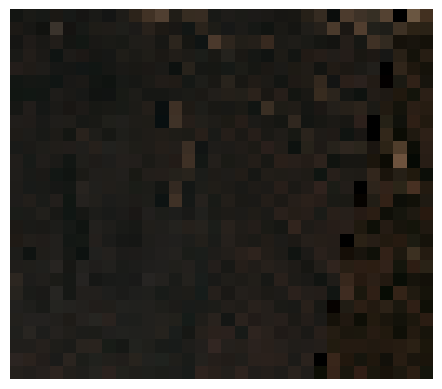

In [28]:
import matplotlib.pyplot as plt
plt.imshow(response[0])
plt.axis("off")
plt.show()


In [29]:
import math
from sentinelhub import BBox, CRS, SentinelHubRequest, MimeType

bbox = BBox([85.75, 20.20, 86.05, 20.45], crs=CRS.WGS84)


min_lon, min_lat = bbox.lower_left
max_lon, max_lat = bbox.upper_right
mid_lat = (min_lat + max_lat) / 2.0

m_per_deg_lat = 111320.0
m_per_deg_lon = 111320.0 * math.cos(math.radians(mid_lat))

width_m  = (max_lon - min_lon) * m_per_deg_lon
height_m = (max_lat - min_lat) * m_per_deg_lat

target_mpp = 500  # meters per pixel (must be <= 1500)
width_px  = int(math.ceil(width_m / target_mpp))
height_px = int(math.ceil(height_m / target_mpp))

print("width_m,height_m:", width_m, height_m)
print("size:", (width_px, height_px), "=> approx m/px:", target_mpp)

request_cdse = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2l2a_cdse,
            time_interval=("2025-12-01", "2025-12-31")
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=(width_px, height_px),
    config=config
)

response = request_cdse.get_data()


width_m,height_m: 31316.680417908075 27830.0
size: (63, 56) => approx m/px: 500


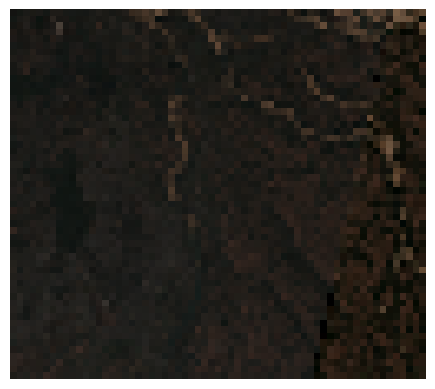

In [30]:
import matplotlib.pyplot as plt
plt.imshow(response[0])
plt.axis("off")
plt.show()

In [33]:
import math
from sentinelhub import BBox, CRS, SentinelHubRequest, MimeType

bbox = BBox([85.75, 20.20, 86.05, 20.45], crs=CRS.WGS84)


min_lon, min_lat = bbox.lower_left
max_lon, max_lat = bbox.upper_right
mid_lat = (min_lat + max_lat) / 2.0

m_per_deg_lat = 111320.0
m_per_deg_lon = 111320.0 * math.cos(math.radians(mid_lat))

width_m  = (max_lon - min_lon) * m_per_deg_lon
height_m = (max_lat - min_lat) * m_per_deg_lat

target_mpp = 100  # meters per pixel (must be <= 1500)
width_px  = int(math.ceil(width_m / target_mpp))
height_px = int(math.ceil(height_m / target_mpp))

print("width_m,height_m:", width_m, height_m)
print("size:", (width_px, height_px), "=> approx m/px:", target_mpp)

request_cdse = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2l2a_cdse,
            time_interval=("2025-12-01", "2025-12-31")
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=(width_px, height_px),
    config=config
)

response = request_cdse.get_data()


width_m,height_m: 31316.680417908075 27830.0
size: (314, 279) => approx m/px: 100


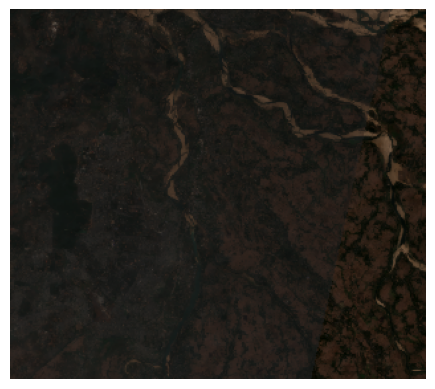

In [34]:
import matplotlib.pyplot as plt
plt.imshow(response[0])
plt.axis("off")
plt.show()

In [42]:
import math
from sentinelhub import BBox, CRS, SentinelHubRequest, MimeType

bbox = BBox([86.00, 20.30, 86.05, 20.35], crs=CRS.WGS84)


min_lon, min_lat = bbox.lower_left
max_lon, max_lat = bbox.upper_right
mid_lat = (min_lat + max_lat) / 2.0

m_per_deg_lat = 111320.0
m_per_deg_lon = 111320.0 * math.cos(math.radians(mid_lat))

width_m  = (max_lon - min_lon) * m_per_deg_lon
height_m = (max_lat - min_lat) * m_per_deg_lat

target_mpp = 10  # meters per pixel (must be <= 1500)
width_px  = int(math.ceil(width_m / target_mpp))
height_px = int(math.ceil(height_m / target_mpp))

print("width_m,height_m:", width_m, height_m)
print("size:", (width_px, height_px), "=> approx m/px:", target_mpp)

request_cdse = SentinelHubRequest(
    data_folder="sentinel2",
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2l2a_cdse,
            time_interval=("2025-12-01", "2025-12-31")
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=(width_px, height_px),
    config=config
)

response = request_cdse.get_data()


width_m,height_m: 5219.4467363177655 5566.000000000079
size: (522, 557) => approx m/px: 10


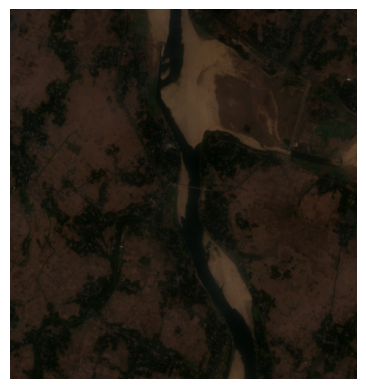

In [43]:
import matplotlib.pyplot as plt
plt.imshow(response[0])
plt.axis("off")
plt.show()